<a href="https://colab.research.google.com/github/drishti5055/Sampling/blob/main/102016102sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [52]:
heading=['Simple-Random','Systematic','Cluster','Stratified','Convenience']
ans=pd.DataFrame(columns=heading, index=['SVM','Logistic Regression','KNN','Random Forest','Naive Bayes'])

In [32]:
#loading our dataset
data = pd.read_csv('https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv')

In [33]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


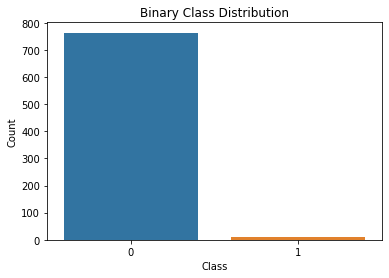

In [34]:

sns.countplot(x="Class", data=data)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Binary Class Distribution')

plt.show()

In [35]:
#as we can see it is an imbalanced dataset with more occurence of 0 class so we need to balance our dataset
data.Class.value_counts()

0    763
1      9
Name: Class, dtype: int64

In [36]:
#spliting features and target variable
X=data.drop(columns={'Class'},axis=1)
y=data['Class']

In [37]:
#Balancing the dataset using random over sampling
ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print('Original dataset shape',Counter(y))
print('Resample dataset shape',Counter(y_ros))


Original dataset shape Counter({0: 763, 1: 9})
Resample dataset shape Counter({0: 763, 1: 763})


In [38]:
#Splitting the balanced dataset
X_train,X_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.25,random_state=42)

In [39]:
y_train.value_counts()

0    587
1    557
Name: Class, dtype: int64

In [40]:
y_test.value_counts()

1    206
0    176
Name: Class, dtype: int64

In [41]:
#As we have used random over-sampling, therefore checking for overfitting using random forest classifer
model=RandomForestClassifier()
model.fit(X_train,y_train)
print('Training Accuracy:',metrics.accuracy_score(y_train,model.predict(X_train))*100)
print('Testing Accuracy:',metrics.accuracy_score(y_test,model.predict(X_test))*100)


Training Accuracy: 100.0
Testing Accuracy: 99.73821989528795


In [13]:
#training and tesing accuracy is same so there is no overfitting,no need to fix it 

In [42]:
#new balanced dataset
df=pd.DataFrame(x_ros)
df['Class']=y_ros
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,529,-2.000567,-2.495484,2.467149,1.140053,2.462010,0.594262,-2.110183,0.788347,0.958809,...,0.422452,1.195394,0.297836,-0.857105,-0.219322,0.861019,-0.124622,-0.171060,1.50,1
1522,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1523,164,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,1
1524,539,-1.738582,0.052740,1.187057,-0.656652,0.920623,-0.291788,0.269083,0.140631,0.023464,...,-0.179545,-0.192036,-0.261879,-0.237477,-0.335040,0.240323,-0.345129,-0.383563,1.00,1


In [43]:
#Simple Random Sampling
z=1.96
p=0.5
E=0.05
sample_size=m.ceil((z**2*p*(1-p))/(E**2))

samples=[]
s1=df.sample(n=sample_size,random_state=0)
samples.append(s1)


In [44]:
#Systematic Sampling
n=len(df) #number of rows
k=int(m.sqrt(n)) #sampling interval as square root of rows
s2=df.iloc[::k] # Select every "k" row starting from a random index in the dataset
samples.append(s2)

In [48]:
#Cluster sampling
z=1.96
p=0.5
E=0.05
C=1.5
sample_size=round((z**2*p*(1-p))/((E/C)**2))
num_select_clusters=2
df_new=df
N = len(df)
K = int(N/sample_size)
data = None
for k in range(K):
    sample_k = df_new.sample(sample_size)
    sample_k["cluster"] = np.repeat(k,len(sample_k))
    df_new = df_new.drop(index = sample_k.index)
    data = pd.concat([data,sample_k],axis = 0)

random_chosen_clusters = np.random.randint(0,K,size = num_select_clusters)
s3 = data[data.cluster.isin(random_chosen_clusters)]
s3.drop(['cluster'], axis=1, inplace=True)
samples.append(s3)

In [49]:
#Stratefied Sampling
z=1.96
p=0.5
E=0.05
S=0.7
sample_size=round((z**2*p*(1-p))/((E/S)**2))
s4=df.groupby('Class', group_keys=False).apply(lambda x: x.sample(sample_size))
samples.append(s4)

In [50]:
#Convenience Sampling
s5=df.head(350)
samples.append(s5)

In [55]:
#Applying Models
for i in range(5):
  j=0
  x_s=samples[i].drop('Class',axis=1)
  y_s=samples[i]['Class']
  # Splitting into train and test
  xtrain, xtest, y_train, y_test = train_test_split(x_s ,y_s , random_state=104, 
                                                    test_size=0.25, shuffle=True)
  
  #Applying SVM
  clf = SVC(kernel='rbf')
  clf.fit(xtrain, y_train) 
  y_pred=clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j,i]=acc*100

  #Applying Logistic Regression
  classifier = LogisticRegression(random_state = 0,max_iter=2000)
  classifier.fit(xtrain, y_train)
  y_pred = classifier.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+1,i]=acc*100
  
  #Applying KNN
  knn = KNeighborsClassifier(n_neighbors=7)
  knn.fit(xtrain, y_train)
  y_pred=knn.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+2,i]=acc*100

  #Applying RandomForest Classifier
  clf = RandomForestClassifier(n_estimators = 100) 
  clf.fit(xtrain, y_train)
  y_pred = clf.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+3,i]=acc*100

  #Applying Naive bayes
  model = GaussianNB()
  model.fit(xtrain,y_train)
  predicted= model.predict(xtest)
  acc = accuracy_score(y_test, y_pred)
  ans.iloc[j+4,i]=acc*100

print(ans)


                    Simple-Random Systematic    Cluster Stratified Convenience
SVM                     67.010309       60.0  65.740741  71.759259   74.468085
Logistic Regression     93.814433       80.0  91.203704  92.592593   92.553191
KNN                     88.659794       40.0  94.907407  93.518519   90.425532
Random Forest               100.0       90.0      100.0      100.0       100.0
Naive Bayes                 100.0       90.0      100.0      100.0       100.0
